
# Advanced Practice in Machine Learning  
**(Handling Imbalanced Datasets & Combining Models)** 

- These techniques are **not harder**, but used in **less frequent, specific situations**



## Problem with Imbalanced Datasets

- Real-world data often has **unequal class distribution**
  - Eg. Fraud detection → 99.9% transactions are genuine
- Classifiers tend to **favor the majority class**
  - **Why?** 
    - Minimizing overall error -  **favors  class that dominates the data**
    - If 99.9% are genuine, a model accuracy can be - 99.9% **just by predicting “genuine” every time**





## SVM and Imbalanced Data

- SVM tries to **minimize a loss function** based on classification margin
- When majority class dominates:
  - **Misclassifying majority points contributes more** to overall cost
  - So the algorithm shifts decision boundary **to favor the majority**
- Result: **Minority class gets ignored**


## EXAMPLE : -
### Creating a datset with Imbalanced Data

Imbalanced distribution: Counter({np.int64(0): 475, np.int64(1): 25})


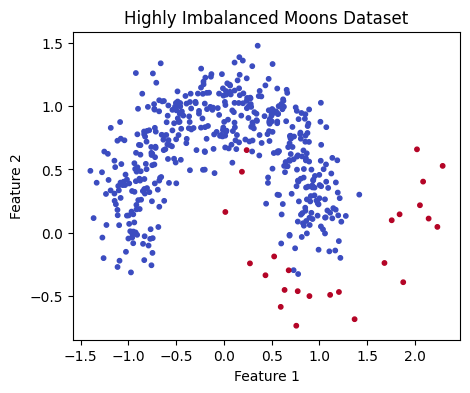

In [31]:
from sklearn.datasets import make_moons
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

# Create full, balanced moon dataset
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

# Split class indices
class_0 = np.where(y == 0)[0]
class_1 = np.where(y == 1)[0]

# Imbalance: keep 95% of class 0, 5% of class 1
np.random.seed(42)
class_0_sampled = np.random.choice(class_0, size=int(0.95 * len(class_0)), replace=False)
class_1_sampled = np.random.choice(class_1, size=int(0.05 * len(class_1)), replace=False)

# Combine
indices = np.concatenate([class_0_sampled, class_1_sampled])
X, y = X[indices], y[indices]

# Show class distribution
print("Imbalanced distribution:", Counter(y))

# Plot
plt.figure(figsize=(5, 4))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=10)
plt.title("Highly Imbalanced Moons Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

### SVM model (default) without class weights

SVM WITHOUT Class Weights:
              precision    recall  f1-score   support

           0      0.975     1.000     0.988       119
           1      1.000     0.500     0.667         6

    accuracy                          0.976       125
   macro avg      0.988     0.750     0.827       125
weighted avg      0.977     0.976     0.972       125



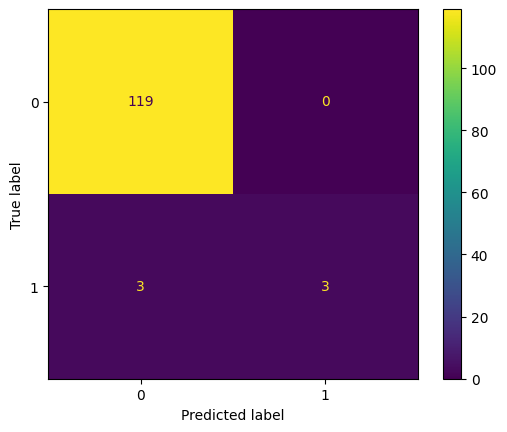

In [32]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

svm_default = SVC(kernel='rbf')
svm_default.fit(X_train, y_train)
y_pred_default = svm_default.predict(X_test)

print("SVM WITHOUT Class Weights:")
print(classification_report(y_test, y_pred_default, digits=3))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_default)


## Adjusting Class Weights in SVM

- You can assign **higher penalty** to misclassifying minority class
  - In `scikit-learn`, use: `class_weight='balanced'`
- The model will **shift the hyperplane** to reduce errors on rare class
- This can improve **recall (sensitivity)** for the minority class  
  → important in fraud, disease detection, etc.



SVM WITH Class Weights:
              precision    recall  f1-score   support

           0     1.0000    0.9916    0.9958       119
           1     0.8571    1.0000    0.9231         6

    accuracy                         0.9920       125
   macro avg     0.9286    0.9958    0.9594       125
weighted avg     0.9931    0.9920    0.9923       125



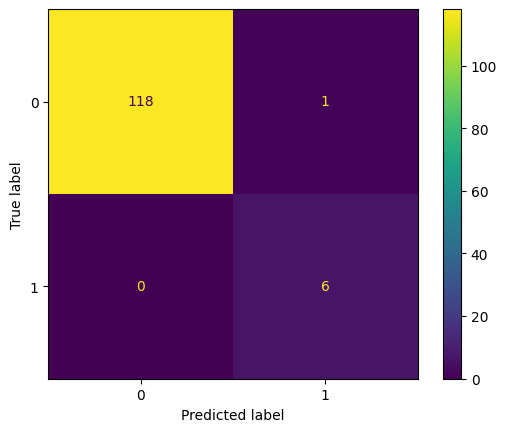

In [33]:
# SVM with class weights

svm_weighted = SVC(kernel='rbf', class_weight='balanced')
svm_weighted.fit(X_train, y_train)
y_pred_weighted = svm_weighted.predict(X_test)

print("SVM WITH Class Weights:")
print(classification_report(y_test, y_pred_weighted, digits=4))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_weighted)

### Visualizing 

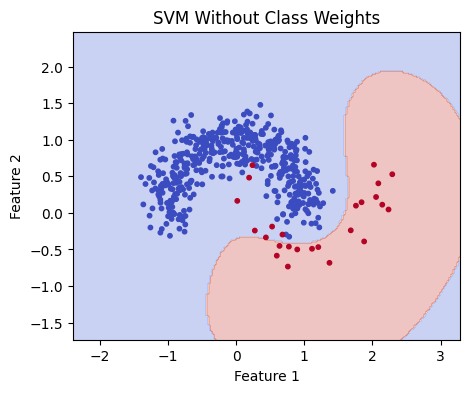

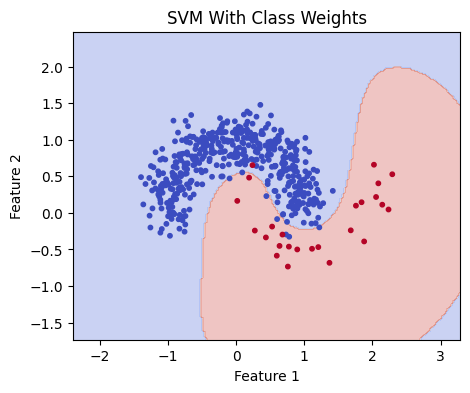

In [34]:
import numpy as np

def plot_decision_boundary(model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(5, 4))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=10)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

plot_decision_boundary(svm_default, "SVM Without Class Weights")
plot_decision_boundary(svm_weighted, "SVM With Class Weights")


## Data-Level Solutions

Balance dataset **before training**, without modifying the algorithm




### 1. Oversampling:
- Duplicate existing examples of minority class
- Helps the model see the class more often during training


In [35]:
# Solving the previous problem using oversampling

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Using a Logistic Rgression model 

# Training clasifier on Imbalanced Dataset (previous problem)
Model_logreg = LogisticRegression()
Model_logreg.fit(X_train, y_train)
y_pred_logreg = Model_logreg.predict(X_test)

print(classification_report(y_test, y_pred_logreg, digits=3))

              precision    recall  f1-score   support

           0      0.960     1.000     0.979       119
           1      1.000     0.167     0.286         6

    accuracy                          0.960       125
   macro avg      0.980     0.583     0.633       125
weighted avg      0.962     0.960     0.946       125



In [36]:
# Banlancing the dataset (Random Oversampling)

from sklearn.utils import resample

# Separate classes
X_0 = X[y == 0]
X_1 = X[y == 1]

# Oversample class 1
X_1_oversamp = resample(X_1, replace=True, n_samples=len(X_0), random_state=42)
y_1_oversamp = np.ones(len(X_0))

# Combine
X_bal = np.vstack([X_0, X_1_oversamp])
y_bal = np.concatenate([np.zeros(len(X_0)), y_1_oversamp])



In [37]:
# Retrain on Balanced Dataset

# Splitting the balanced dataset
from sklearn.model_selection import train_test_split
X_bal_train, X_bal_test, y_bal_train, y_bal_test = train_test_split(X_bal, y_bal, stratify=y_bal, random_state=42)

# Training classifier on the balanced dataset
Model_logreg_bal = LogisticRegression()
Model_logreg_bal.fit(X_bal_train, y_bal_train)
y_bal_pred = Model_logreg_bal.predict(X_bal_test)

print(classification_report(y_bal_test, y_bal_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.83      0.86       119
         1.0       0.84      0.89      0.87       119

    accuracy                           0.86       238
   macro avg       0.86      0.86      0.86       238
weighted avg       0.86      0.86      0.86       238



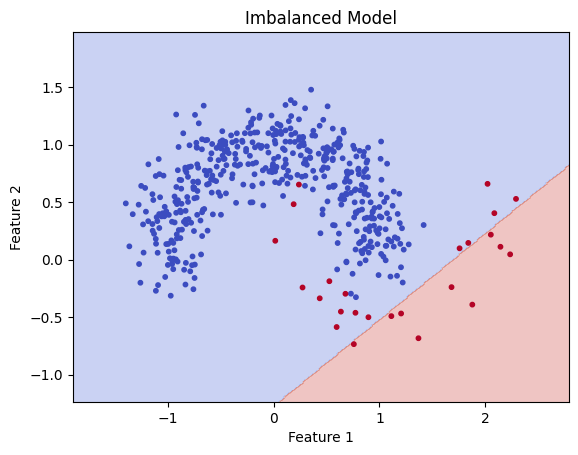

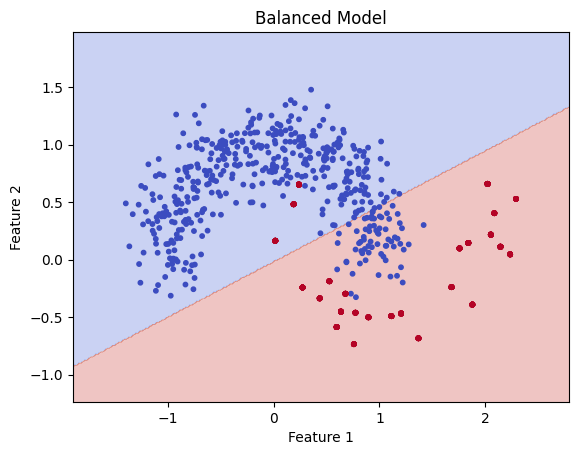

In [38]:
# Visual Comparison of Decision Boundaries 

def plot_decision_boundary(Model, X, y, title="Decision Boundary"):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    Z = Model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=10)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

plot_decision_boundary(Model_logreg, X, y, "Imbalanced Model")
plot_decision_boundary(Model_logreg_bal, X_bal, y_bal, "Balanced Model")



### 2. Undersampling:
- Randomly remove examples from the majority class
- Risk: Potentially discard useful data


In [39]:
# Banlancing the dataset (Random Undersampling)

# Applying on the previous problem
from sklearn.utils import resample

# Separate classes
X_0 = X[y == 0]
X_1 = X[y == 1]
y_0 = np.zeros(len(X_0))
y_1 = np.ones(len(X_1))

# Undersample class 0
X_0_undersamp = resample(X_0, replace=False, n_samples=len(X_1), random_state=42)
y_0_undersamp = np.zeros(len(X_1))

# Combine
X_bal_2 = np.vstack([X_0_undersamp, X_1])
y_bal_2 = np.concatenate([y_0_undersamp, y_1])

print("After undersampling:", Counter(y_bal_2))


After undersampling: Counter({np.float64(0.0): 25, np.float64(1.0): 25})


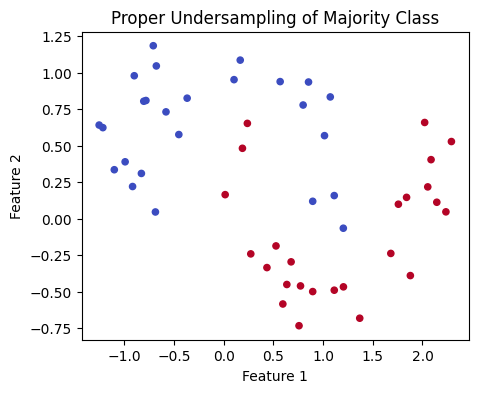

In [40]:
# Ploting the properly balanced (undersampled) dataset

plt.figure(figsize=(5, 4))
plt.scatter(X_bal_2[:, 0], X_bal_2[:, 1], c=y_bal_2, cmap='coolwarm', s=20)
plt.title("Proper Undersampling of Majority Class")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(False)
plt.show()


## Synthetic Sampling (SMOTE & ADASYN)

 **SMOTE :-**
- For each minority point $x_i$, pick a neighbor $x_z$
- Create:  
  $$
  x_{new} = x_i + \lambda (x_z - x_i)
  $$  
  $$
  \text{where } λ ∈ [0,1]
  $$
- Result: New point **on the line** between $x_i$ and $x_z$

---

 **ADASYN:**
- Like SMOTE, but **focuses on areas with fewer minority samples**
- Generates **more synthetic points** where the class is **harder to learn**

## Why Use SMOTE or ADASYN?

- Helps **generalize** decision boundaries
- Prevents **overfitting** that simple oversampling (copying) may cause
- Makes training dataset **more representative**




Original class distribution: Counter({np.int64(0): 500, np.int64(1): 50})

Original Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       150
           1       0.88      0.47      0.61        15

    accuracy                           0.95       165
   macro avg       0.91      0.73      0.79       165
weighted avg       0.94      0.95      0.94       165



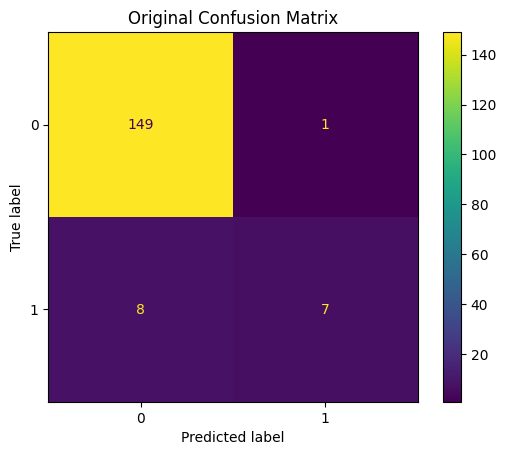

SMOTE class distribution: Counter({np.int64(0): 350, np.int64(1): 350})

SMOTE Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       150
           1       0.65      0.87      0.74        15

    accuracy                           0.95       165
   macro avg       0.82      0.91      0.86       165
weighted avg       0.96      0.95      0.95       165



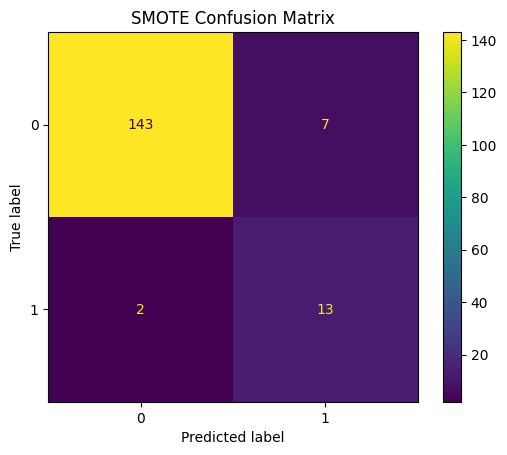

ADASYN class distribution: Counter({np.int64(0): 350, np.int64(1): 347})

ADASYN Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       150
           1       0.58      0.73      0.65        15

    accuracy                           0.93       165
   macro avg       0.78      0.84      0.80       165
weighted avg       0.94      0.93      0.93       165



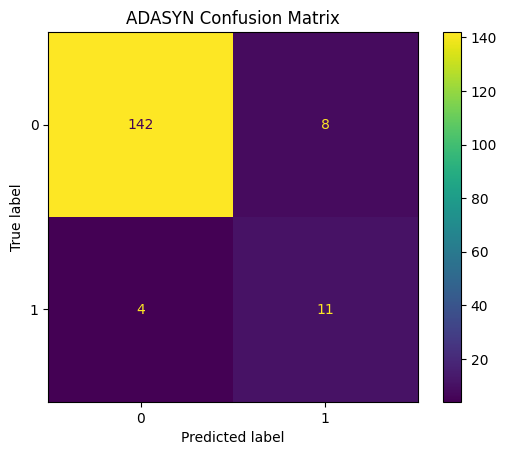

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE, ADASYN
from collections import Counter

# Creating imbalanced moon dataset
X, y = make_moons(n_samples=1000, noise=0.3, random_state=42)

# Introducing imbalance: remove most of class 1
X = np.vstack((X[y == 0][:900], X[y == 1][:50]))
y = np.hstack((y[y == 0][:900], y[y == 1][:50]))

print(f"Original class distribution: {Counter(y)}")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

# Function for training and evaluation
def train_and_evaluate(X_train, y_train, X_test, y_test, title=""):
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    print(f"\n{title} Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))

    disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
    disp.plot()
    plt.title(f"{title} Confusion Matrix")
    plt.show()

# Original imbalanced training
train_and_evaluate(X_train, y_train, X_test, y_test, "Original")

# Applying SMOTE
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)
print(f"SMOTE class distribution: {Counter(y_train_sm)}")
train_and_evaluate(X_train_sm, y_train_sm, X_test, y_test, "SMOTE")

# Applying ADASYN
adasyn = ADASYN(random_state=42)
X_train_ad, y_train_ad = adasyn.fit_resample(X_train, y_train)
print(f"ADASYN class distribution: {Counter(y_train_ad)}")
train_and_evaluate(X_train_ad, y_train_ad, X_test, y_test, "ADASYN")

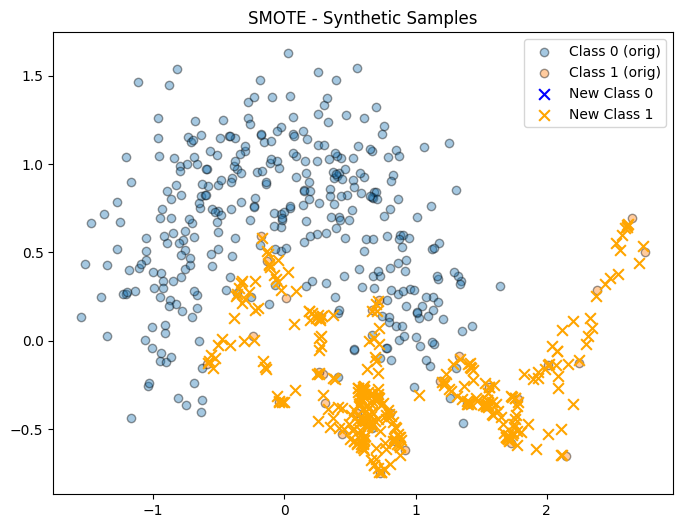

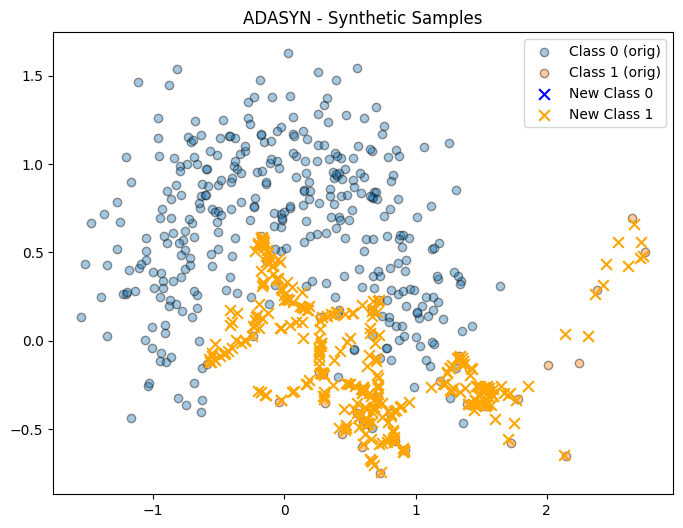

In [42]:
# Ploting decision regions and resampled points
def plot_resampled(X_orig, y_orig, X_res, y_res, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X_orig[y_orig == 0][:, 0], X_orig[y_orig == 0][:, 1], alpha=0.4, label="Class 0 (orig)", edgecolor='k')
    plt.scatter(X_orig[y_orig == 1][:, 0], X_orig[y_orig == 1][:, 1], alpha=0.4, label="Class 1 (orig)", edgecolor='k')
    
    synthetic_idx = len(X_orig)
    new_pts = X_res[synthetic_idx:]
    new_labels = y_res[synthetic_idx:]

    plt.scatter(new_pts[new_labels == 0][:, 0], new_pts[new_labels == 0][:, 1],
                marker='x', c='blue', label='New Class 0', s=60)
    plt.scatter(new_pts[new_labels == 1][:, 0], new_pts[new_labels == 1][:, 1],
                marker='x', c='orange', label='New Class 1', s=60)
    
    plt.legend()
    plt.title(f"{title} - Synthetic Samples")
    plt.show()

# Plot SMOTE and ADASYN resampled data
plot_resampled(X_train, y_train, X_train_sm, y_train_sm, "SMOTE")
plot_resampled(X_train, y_train, X_train_ad, y_train_ad, "ADASYN")

## Models Robust to Imbalance

Some algorithms handle imbalance **better by default**:

- Decision Trees  
- Random Forest  
- Gradient Boosting

**Why?**
- They split based on **information gain** or **Gini index**, not class frequency
- Learn **local patterns**, even from a few minority examples


---
# Combining Models
---

Also called **Ensembling**

- Combine **multiple models** to improve accuracy
- Boosts performance by **leveraging diversity**
- Example:
  - One model detects fraud well
  - Another is better at detecting outliers
  - Together, they’re more powerful

## Why Does Ensembling Work?

 “Several uncorrelated models agreeing = more likely to be correct”

- Each model makes **different errors**
- If errors are **uncorrelated**, they can **cancel each other out**
- Works best with models trained on:
  - **Different features**
  - **Different algorithms** (e.g., SVM + Random Forest)

## Ways to Combine Models

### 1. Averaging  
 For regression or classifiers that return **probabilities**

- Models return **score/probability**
- Combine by **taking the mean**
- Smooths out individual model biases



### 2. Majority Voting  
For classification (each model votes on output)

- Each model picks a class
- Final class is the **most common prediction**
- For ties: Random tie-break Or reject prediction (if error is costly)



### 3. Stacking (Meta-Learning)
Combine model outputs using a **meta-model**

- Combine predictions from multiple models using another model
- Base models: $f_1(x), f_2(x), ...$
- For each input $x$, collect:
  $$
  x̂ = [f_1(x), f_2(x), ...]
  $$  
  This becomes the input to a **meta-model**
- The true label $y$ is used as target → train on $(x̂, y)$




## What Kind of Meta-Model?

- Often a **simple, fast** model like:
  - **Logistic Regression** (most common)
  - **Decision Tree**
  - **Random Forest** (if base models are very different)
- Purpose: Learn how to **trust or weight** each base model



### Example: Stacking for Fraud Detection

**Base models:**
1. $f_1$ – Logistic Regression on transaction amount
2. $f_2$ – Random Forest on user behavior
3. $f_3$ – SVM on device/IP history

**Meta-model:**
- **Logistic Regression** trained on outputs $[f_1(x), f_2(x), f_3(x)]$

The meta-model learns:

- When $f_1$ is unreliable (e.g., small transactions)
- When $f_2$ is more confident (e.g., behavioral anomalies)



**# Use Class Probabilities (Not Just Labels)**

- If base models output **probabilities or scores**, use them:
  - Instead of $[0, 1, 1]$, use $[0.2, 0.9, 0.8]$
- Gives meta-model **more information** about certainty
- Helps capture **confidence patterns** from base models


### Examples :-

### 1. Previous problem (Moon dataset)

In [43]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from scipy.stats import mode
import numpy as np

# 1. Prepare data
X, y = make_moons(n_samples=500, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Train individual models
log_clf = LogisticRegression(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(probability=True, random_state=42)

log_clf.fit(X_train_scaled, y_train)
rf_clf.fit(X_train_scaled, y_train)
svm_clf.fit(X_train_scaled, y_train)

# 3. Predict & evaluate individual models
acc_log = accuracy_score(y_test, log_clf.predict(X_test_scaled))
acc_rf = accuracy_score(y_test, rf_clf.predict(X_test_scaled))
acc_svm = accuracy_score(y_test, svm_clf.predict(X_test_scaled))

# 4. Averaging ensemble (probabilities)
avg_proba = (
    log_clf.predict_proba(X_test_scaled) +
    rf_clf.predict_proba(X_test_scaled) +
    svm_clf.predict_proba(X_test_scaled)
) / 3
y_pred_avg = np.argmax(avg_proba, axis=1)
acc_avg = accuracy_score(y_test, y_pred_avg)

# 5. Majority voting ensemble
preds = np.array([
    log_clf.predict(X_test_scaled),
    rf_clf.predict(X_test_scaled),
    svm_clf.predict(X_test_scaled)
])
y_pred_vote = mode(preds, axis=0).mode.flatten()
acc_vote = accuracy_score(y_test, y_pred_vote)

# 6. Stacking ensemble
stack_train = np.column_stack([
    log_clf.predict_proba(X_train_scaled)[:, 1],
    rf_clf.predict_proba(X_train_scaled)[:, 1],
    svm_clf.predict_proba(X_train_scaled)[:, 1]
])
stack_test = np.column_stack([
    log_clf.predict_proba(X_test_scaled)[:, 1],
    rf_clf.predict_proba(X_test_scaled)[:, 1],
    svm_clf.predict_proba(X_test_scaled)[:, 1]
])

meta_model = LogisticRegression(random_state=42)
meta_model.fit(stack_train, y_train)
y_pred_stack = meta_model.predict(stack_test)
acc_stack = accuracy_score(y_test, y_pred_stack)

# 7. Display results clearly
print("Individual Model Accuracies:")
print(f"  Logistic Regression: {acc_log:.3f}")
print(f"  Random Forest:       {acc_rf:.3f}")
print(f"  SVM:                 {acc_svm:.3f}")

print("\nEnsemble Model Accuracies:")
print(f"  Averaging:           {acc_avg:.3f} {'(Improved)' if acc_avg > max(acc_log, acc_rf, acc_svm) else '(No Improvement)'}")
print(f"  Majority Voting:     {acc_vote:.3f} {'(Improved)' if acc_vote > max(acc_log, acc_rf, acc_svm) else '(No Improvement)'}")
print(f"  Stacking:            {acc_stack:.3f} {'(Improved)' if acc_stack > max(acc_log, acc_rf, acc_svm) else '(No Improvement)'}")

Individual Model Accuracies:
  Logistic Regression: 0.832
  Random Forest:       0.904
  SVM:                 0.904

Ensemble Model Accuracies:
  Averaging:           0.912 (Improved)
  Majority Voting:     0.904 (No Improvement)
  Stacking:            0.896 (No Improvement)


---

# Why Does Averaging Improve but Others May Not?

- **Averaging (Soft Voting):**  
  Uses predicted probabilities → lets confident models influence decisions → smooths errors → often improves accuracy.

- **Majority Voting:**  
  Ignores confidence → treats all models equally → correlated errors not fixed → sometimes no improvement.

- **Stacking:**  
  Needs enough data and model diversity → meta-model learns weights → with limited data, may not improve or overfit.


### 2. Fraud Detection Problem

(We are creating the dataset on our own)

In [44]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from scipy.stats import mode

# 1. Simulated fraud dataset with 3 feature blocks:
# Columns: [Transaction Amount | User Behavior | Device/IP Info]
np.random.seed(42)
n_samples = 1000

# Simulate features
transaction_amount = np.random.normal(loc=100, scale=50, size=(n_samples, 1))  # f1
user_behavior = np.random.rand(n_samples, 3)                                   # f2
device_info = np.random.randint(0, 2, size=(n_samples, 2))                     # f3

# Simulate binary fraud labels (somewhat correlated)
fraud_probability = (
    0.3 * (transaction_amount > 120).astype(int).flatten() +
    0.4 * user_behavior[:, 1] +
    0.3 * device_info[:, 0]
)
y = (fraud_probability > 0.6).astype(int)

# Combine features
X = np.hstack([transaction_amount, user_behavior, device_info])
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Scale all features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Split features into separate views
X_train_f1 = X_train_scaled[:, [0]]           # Transaction Amount
X_train_f2 = X_train_scaled[:, 1:4]           # User Behavior
X_train_f3 = X_train_scaled[:, 4:6]           # Device/IP Info

X_test_f1 = X_test_scaled[:, [0]]
X_test_f2 = X_test_scaled[:, 1:4]
X_test_f3 = X_test_scaled[:, 4:6]

# 3. Train base models
f1 = LogisticRegression(random_state=42)
f2 = RandomForestClassifier(random_state=42)
f3 = SVC(probability=True, random_state=42)

f1.fit(X_train_f1, y_train)
f2.fit(X_train_f2, y_train)
f3.fit(X_train_f3, y_train)

# 4. Evaluate base models
acc_f1 = accuracy_score(y_test, f1.predict(X_test_f1))
acc_f2 = accuracy_score(y_test, f2.predict(X_test_f2))
acc_f3 = accuracy_score(y_test, f3.predict(X_test_f3))

# 5. Averaging predictions (class probabilities)
avg_probs = (
    f1.predict_proba(X_test_f1) +
    f2.predict_proba(X_test_f2) +
    f3.predict_proba(X_test_f3)
) / 3
y_pred_avg = np.argmax(avg_probs, axis=1)
acc_avg = accuracy_score(y_test, y_pred_avg)

# 6. Majority voting
vote_preds = np.array([
    f1.predict(X_test_f1),
    f2.predict(X_test_f2),
    f3.predict(X_test_f3)
])
y_pred_vote = mode(vote_preds, axis=0).mode.flatten()
acc_vote = accuracy_score(y_test, y_pred_vote)

# 7. Stacking: use class probabilities as features
X_train_meta = np.column_stack([
    f1.predict_proba(X_train_f1)[:, 1],
    f2.predict_proba(X_train_f2)[:, 1],
    f3.predict_proba(X_train_f3)[:, 1],
])
X_test_meta = np.column_stack([
    f1.predict_proba(X_test_f1)[:, 1],
    f2.predict_proba(X_test_f2)[:, 1],
    f3.predict_proba(X_test_f3)[:, 1],
])
meta_model = LogisticRegression(random_state=42)
meta_model.fit(X_train_meta, y_train)
y_pred_stack = meta_model.predict(X_test_meta)
acc_stack = accuracy_score(y_test, y_pred_stack)

# 8. Print results
print("Base Model Accuracies:")
print(f"  f1 (Transaction Amount):   {acc_f1:.3f}")
print(f"  f2 (User Behavior):        {acc_f2:.3f}")
print(f"  f3 (Device/IP Info):       {acc_f3:.3f}")

print("\nEnsemble Model Accuracies:")
print(f"  Averaging:                 {acc_avg:.3f} {'(Improved)' if acc_avg > max(acc_f1, acc_f2, acc_f3) else '(No Improvement)'}")
print(f"  Majority Voting:           {acc_vote:.3f} {'(Improved)' if acc_vote > max(acc_f1, acc_f2, acc_f3) else '(No Improvement)'}")
print(f"  Stacking:                  {acc_stack:.3f} {'(Improved)' if acc_stack > max(acc_f1, acc_f2, acc_f3) else '(No Improvement)'}")

Base Model Accuracies:
  f1 (Transaction Amount):   0.736
  f2 (User Behavior):        0.808
  f3 (Device/IP Info):       0.716

Ensemble Model Accuracies:
  Averaging:                 0.744 (No Improvement)
  Majority Voting:           0.732 (No Improvement)
  Stacking:                  0.820 (Improved)


---

## Why Stacking > Averaging (Fraud Detection)

- Averaging treats all model outputs equally  
  → can **dilute signals** from stronger models

- Fraud detection is **imbalanced** and needs nuanced decisions  
  → some models catch subtle fraud better than others

- **Stacking** uses a meta-model to **learn which model to trust**  
  → adapts to complex patterns, improves generalization

- Especially helpful when base models are **diverse in strengths**

---
## Training Neural Networks
---

Neural networks expect **structured, uniform input**

- **Images** → Resize to same dimensions, normalize to [0, 1]. Ensures pixel values have consistent scale  
- **Text** → Tokenize (words, punctuation, symbols)

Each data type needs careful **preprocessing** before feeding into a network



---

## Encoding Text for Neural Networks

### For CNNs & RNNs:
- Use **one-hot encoding**:  
  - Each word/token becomes a binary vector  
- Better: Use **word embeddings** (e.g., Word2Vec, GloVe)  
  - Capture semantic relationships between words

### For MLPs (Multilayer Perceptrons):
- Use **Bag-of-Words**, especially for **longer texts** like reviews, emails.  
  - Works poorly for **short texts** like tweets or SMS

---



## Choosing a Neural Network Architecture

- Many tasks (like sequence-to-sequence) have **multiple architectures**
- New models emerge **every year** (e.g., Transformers, ConvNeXt, etc.)

**How to choose?**
- Look for **state-of-the-art** solutions using:
  - Google Scholar  
  - Microsoft Academic

- If you want simplicity:
  - Search GitHub for existing implementations  
  - Start from something **close to use case**

## Should You Use the Latest Model?

Fancy/Modern ≠ Better (for your case)

- Modern models often:
  - Require **huge datasets**
  - Need **expensive hardware**
  - Are **complex to implement**

**Often better to:**
- Use a **simpler, well-tested model**
- Focus effort on:
  - **Preprocessing**
  - **Getting more data**
  - **Tuning your training process**





## Deciding Network Depth and Size

**Start simple → grow as needed**
1. Begin with **1 or 2 layers**
2. Train and check:
   - Does it fit training data well? ( **Low bias**?)
3. If **underfitting**:
   - Increase **layer size**
   - Add **more layers**
4. If **overfitting**:
   - Apply **regularization**

Iterate until your model performs well on **both training and validation** sets



---
## Advanced Regularization Techniques
---

Neural networks overfit easily → Regularization is essential

Beyond L1/L2, use:

- **Dropout**  
- **Batch Normalization**  
- **Early Stopping**  
- **Data Augmentation**

Some methods are **specific to neural nets**; others are **universal**

---



## Dropout: -

**Dropout** randomly disables a percentage of neurons during each training pass

- Forces the network to **not rely too much on any one neuron**
- Reduces **co-dependency** between neurons

Control it via a **dropout rate** (0 to 1)
- Example: `Dropout(0.5)` drops half the units per batch  
- Tune the rate using **validation data**

Add dropout layers in frameworks like Keras, PyTorch

---



## Batch Normalization : -

Standardizes outputs of each layer → keeps training **fast and stable**

- Normalizes intermediate activations:
  - Mean ≈ 0  
  - Std Dev ≈ 1
- Reduces **internal covariate shift**

- Though not designed for it, it acts like a **regularizer**

- Often placed **between linear (Dense/Conv) layers and activations**

---



## Early Stopping : -

Training loss always goes down — but validation loss doesn’t!

- After some point, the model **overfits**
- Early stopping **pauses training** before that happens

**How it works :**
1. After each epoch, save the model
2. Monitor validation performance
3. Stop when it **starts to degrade**

Keep **best-performing checkpoint**, prevent waste of compute
---


## Data Augmentation: Create More from Less


- Used mostly in **image tasks**

- Apply transformations to training images:
    - Rotate, Flip, Zoom, Change brightness, etc.

- Label stays the same  
- Great for boosting model **generalization**
- Also used in: Audio (noise addition), Text (e.g., synonym replacement)

---



## Handling Multiple Inputs

- In many real-world problems, data is **multimodal**  
  → comes from different sources/types

**Examples**:
- Product info = **image + description**
- Medical diagnosis = **X-ray + patient record**
- Visual question answering = **image + text**

---



## Are Shallow Models Enough?

Traditional ML models struggle with multimodal data because:
- They expect **flat, single-type** input (just vectors)
- They can't **specialize** for each data modality



## SOLUTION : Train Models Separately

### Step-by-step:
1. Train one model on **image**
2. Train another on **text**
3. Combine predictions  
   → use **ensembling** (e.g., stacking, averaging)

Works well if:
- Modalities are **somewhat independent**
- Each model is good at capturing its part



## Alternative: Concatenate Feature Vectors

If you can **vectorize** both inputs:

- Image features: $[i_1, i_2, i_3]$  
- Text features: $[t_1, t_2, t_3, t_4]$

Combine to: $[i_1, i_2, i_3, t_1, t_2, t_3, t_4]$

Train a single model on this **combined feature vector**

- Useful with shallow models like logistic regression, SVM, or tree-based methods

---



## Deep Learning: More Flexible and Powerful

Neural networks allow:
- **Separate subnetworks** for each input type
- Special layers suited for each:
  - **CNN** for images
  - **RNN or Transformer** for text

Then:
- Combine learned **embeddings**
- Add **classification layers** on top


## Example: Neural Model for Image + Text

**Task:** Check if caption matches the image

### Network Structure:
- CNN → Embedding vector for image  
- RNN → Embedding vector for text

- **Concatenate embeddings**  
- Feed to a **classifier layer** (e.g., softmax)

End-to-end training: model learns **joint representation**  

---



## Handling Multiple Outputs

Some tasks need to predict more than one thing at a time  **Multi-output problems**

Example :
- Input: Image of a cat  
- Outputs:  
  - Coordinates of the cat
  - Label: “cat”



## Strategy 1: Multi-label Classification

- When outputs are **independent** and **discrete** (e.g., tags)
- Model predicts all labels at once using:
  - One-hot or multi-hot vectors
  - Sigmoid activation + binary cross-entropy loss

Works well when outputs are **similar in nature**



## Strategy 2: Separate Outputs from Shared Encoder

Complex case: Outputs are **different in nature**

- Example:
    - Input: Image
    - Output 1: Coordinates (real numbers)
    - Output 2: Label (categorical class)

Solution :  
- Build an **encoder subnetwork** (e.g., CNN)
- Add two **heads** on top:
  - One predicts coordinates
  - One predicts label

### Architecture Breakdown

- **Input** : Image (e.g., 128×128×3)


- **Convolutional Encoder**
  - Extracts features from the image
- **Embedding Layer**
  - Dense representation used by both heads

**Two Output Heads**
-  **Coordinates Head** *(Regression Task)*
    - Activation: **ReLU**
    - Loss: **Mean Squared Error (MSE)**
    - Predicts: Real-valued coordinates (e.g., object position)

- **Label Head** *(Classification Task)*
    - Activation: **Softmax**
    - Loss: **Cross-Entropy**
    - Predicts: Class probabilities (e.g., Cat vs. Dog)



## Problem: Two Loss Functions

We now have:
- `C₁`: Loss for coordinates (e.g., MSE)
- `C₂`: Loss for label (e.g., cross-entropy)

Optimizing both **at once** is hard:
- Improving one may affect the other



## Solution: Weighted Combined Loss

Define combined loss :
$$
\text{Total Loss} = \alpha C_1 + (1 - \alpha) C_2
$$

- $\alpha \in (0, 1)$ is a **hyperparameter**

- Controls **tradeoff** between tasks

- If labels are more important, choose lower $\alpha$  
- If location matters more, use higher $\alpha$


---
# Transfer Learning
---

- Adapt a pre-trained model to a **new but related task**  
- Useful when:
  - You have a **large labeled dataset** for Task A (e.g., wild animals)  
  - You have **limited data** for Task B (e.g., domestic animals)  



### Why Does Transfer Learning Work?

- Early neural network layers learn **general features** (edges, shapes, textures)  
- These features are **reusable** across different but related problems  
- Saves time and data labeling effort  



## How Does It Work?

1. Train a deep model on a **large original dataset**  
2. Remove the last one or more layers (usually task-specific layers)  
3. Replace with new layers suited for your new problem  
4. **Freeze** the remaining pre-trained layers  
5. Train only the new layers on the **smaller new dataset**  



## Example: Wild Animals → Domestic Animals

- Pre-trained CNN on wild animal images (large dataset)  
- Remove classifier layers, add new layers for domestic animal classes  
- Freeze convolutional layers (feature extractor)  
- Train new classifier layers on small domestic animal dataset  


---
# Algorithmic Efficiency
---

## Why Efficiency Matters

- Some algorithms solve problems but are too slow or memory-heavy to be practical  
- Efficiency depends on how time or space grows with input size  



## Big-O Notation: Measuring Algorithm Complexity

- Describes **worst-case growth** of time or space with input size $N$  
- Example:  
  - Naive max-distance algorithm: $O(N^2)$
  - Optimized max-distance algorithm: $O(N)$

## Naive Algorithm Example (O(N²))

In [45]:
def find_max_distance(S):
    result = None
    max_distance = 0
    for x1 in S:
        for x2 in S:
            if abs(x1 - x2) >= max_distance:
                max_distance = abs(x1 - x2)
                result = (x1, x2)
    return result


Checks every pair → slow for large datasets
---

## Efficient Algorithm Example (O(N))

```python

def find_max_distance(S):
    min_x = float("inf")
    max_x = float("-inf")
    for x in S:
        if x < min_x:
            min_x = x
        elif x > max_x:
            max_x = x
    return (max_x, min_x)
```
One pass through data → much faster



## Efficient Data Structures Matter

- If **order doesn’t matter**, use a **set** instead of a list  
- Why?  
  - Membership check `x in S` is **fast** $(O(1))$ for sets  
  - But **slow** $(O(N))$ for lists, especially large ones  

- Use Dictionaries for Fast Lookups

    - Python **dict** = key-value pairs (aka hashmap)  
    - Allows **fast retrieval** of values by key $(O(1))$ 
    - Useful for counting, caching, indexing data  



## Prefer Popular Scientific Libraries

- Libraries like **numpy**, **scipy**, **scikit-learn** are optimized for speed  
- Implemented in **C** under the hood → faster than pure Python  

## Use Generators for Large Data

- Generators yield one item at a time instead of loading all data at once  
- Saves memory and improves performance when handling big datasets  

